# 8章 機械学習のモデルを解釈する

## 8.2 学習用のファイルをアップロードして確認する

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

source_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
source_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
source_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
attrition_label = (source_df.Attrition == 'Yes').astype(np.int64)
attrition_label

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [5]:
single_value_column = source_df.nunique() == 1
source_df.drop(source_df.columns[single_value_column], axis=1, inplace=True)

categorical_df = source_df.select_dtypes(include=['object'])
categorical_df.drop(['Attrition'], axis=1, inplace=True) # 目的変数の除去
categorical_df

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [6]:
numerical_df = source_df.select_dtypes(include=['int64'])
numerical_df.drop(['EmployeeNumber'], axis=1, inplace=True)
numerical_df

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [7]:
converted_df = pd.concat([numerical_df, pd.get_dummies(categorical_df)], axis=1)
converted_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,...,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,1,0,0,1,0,1,0


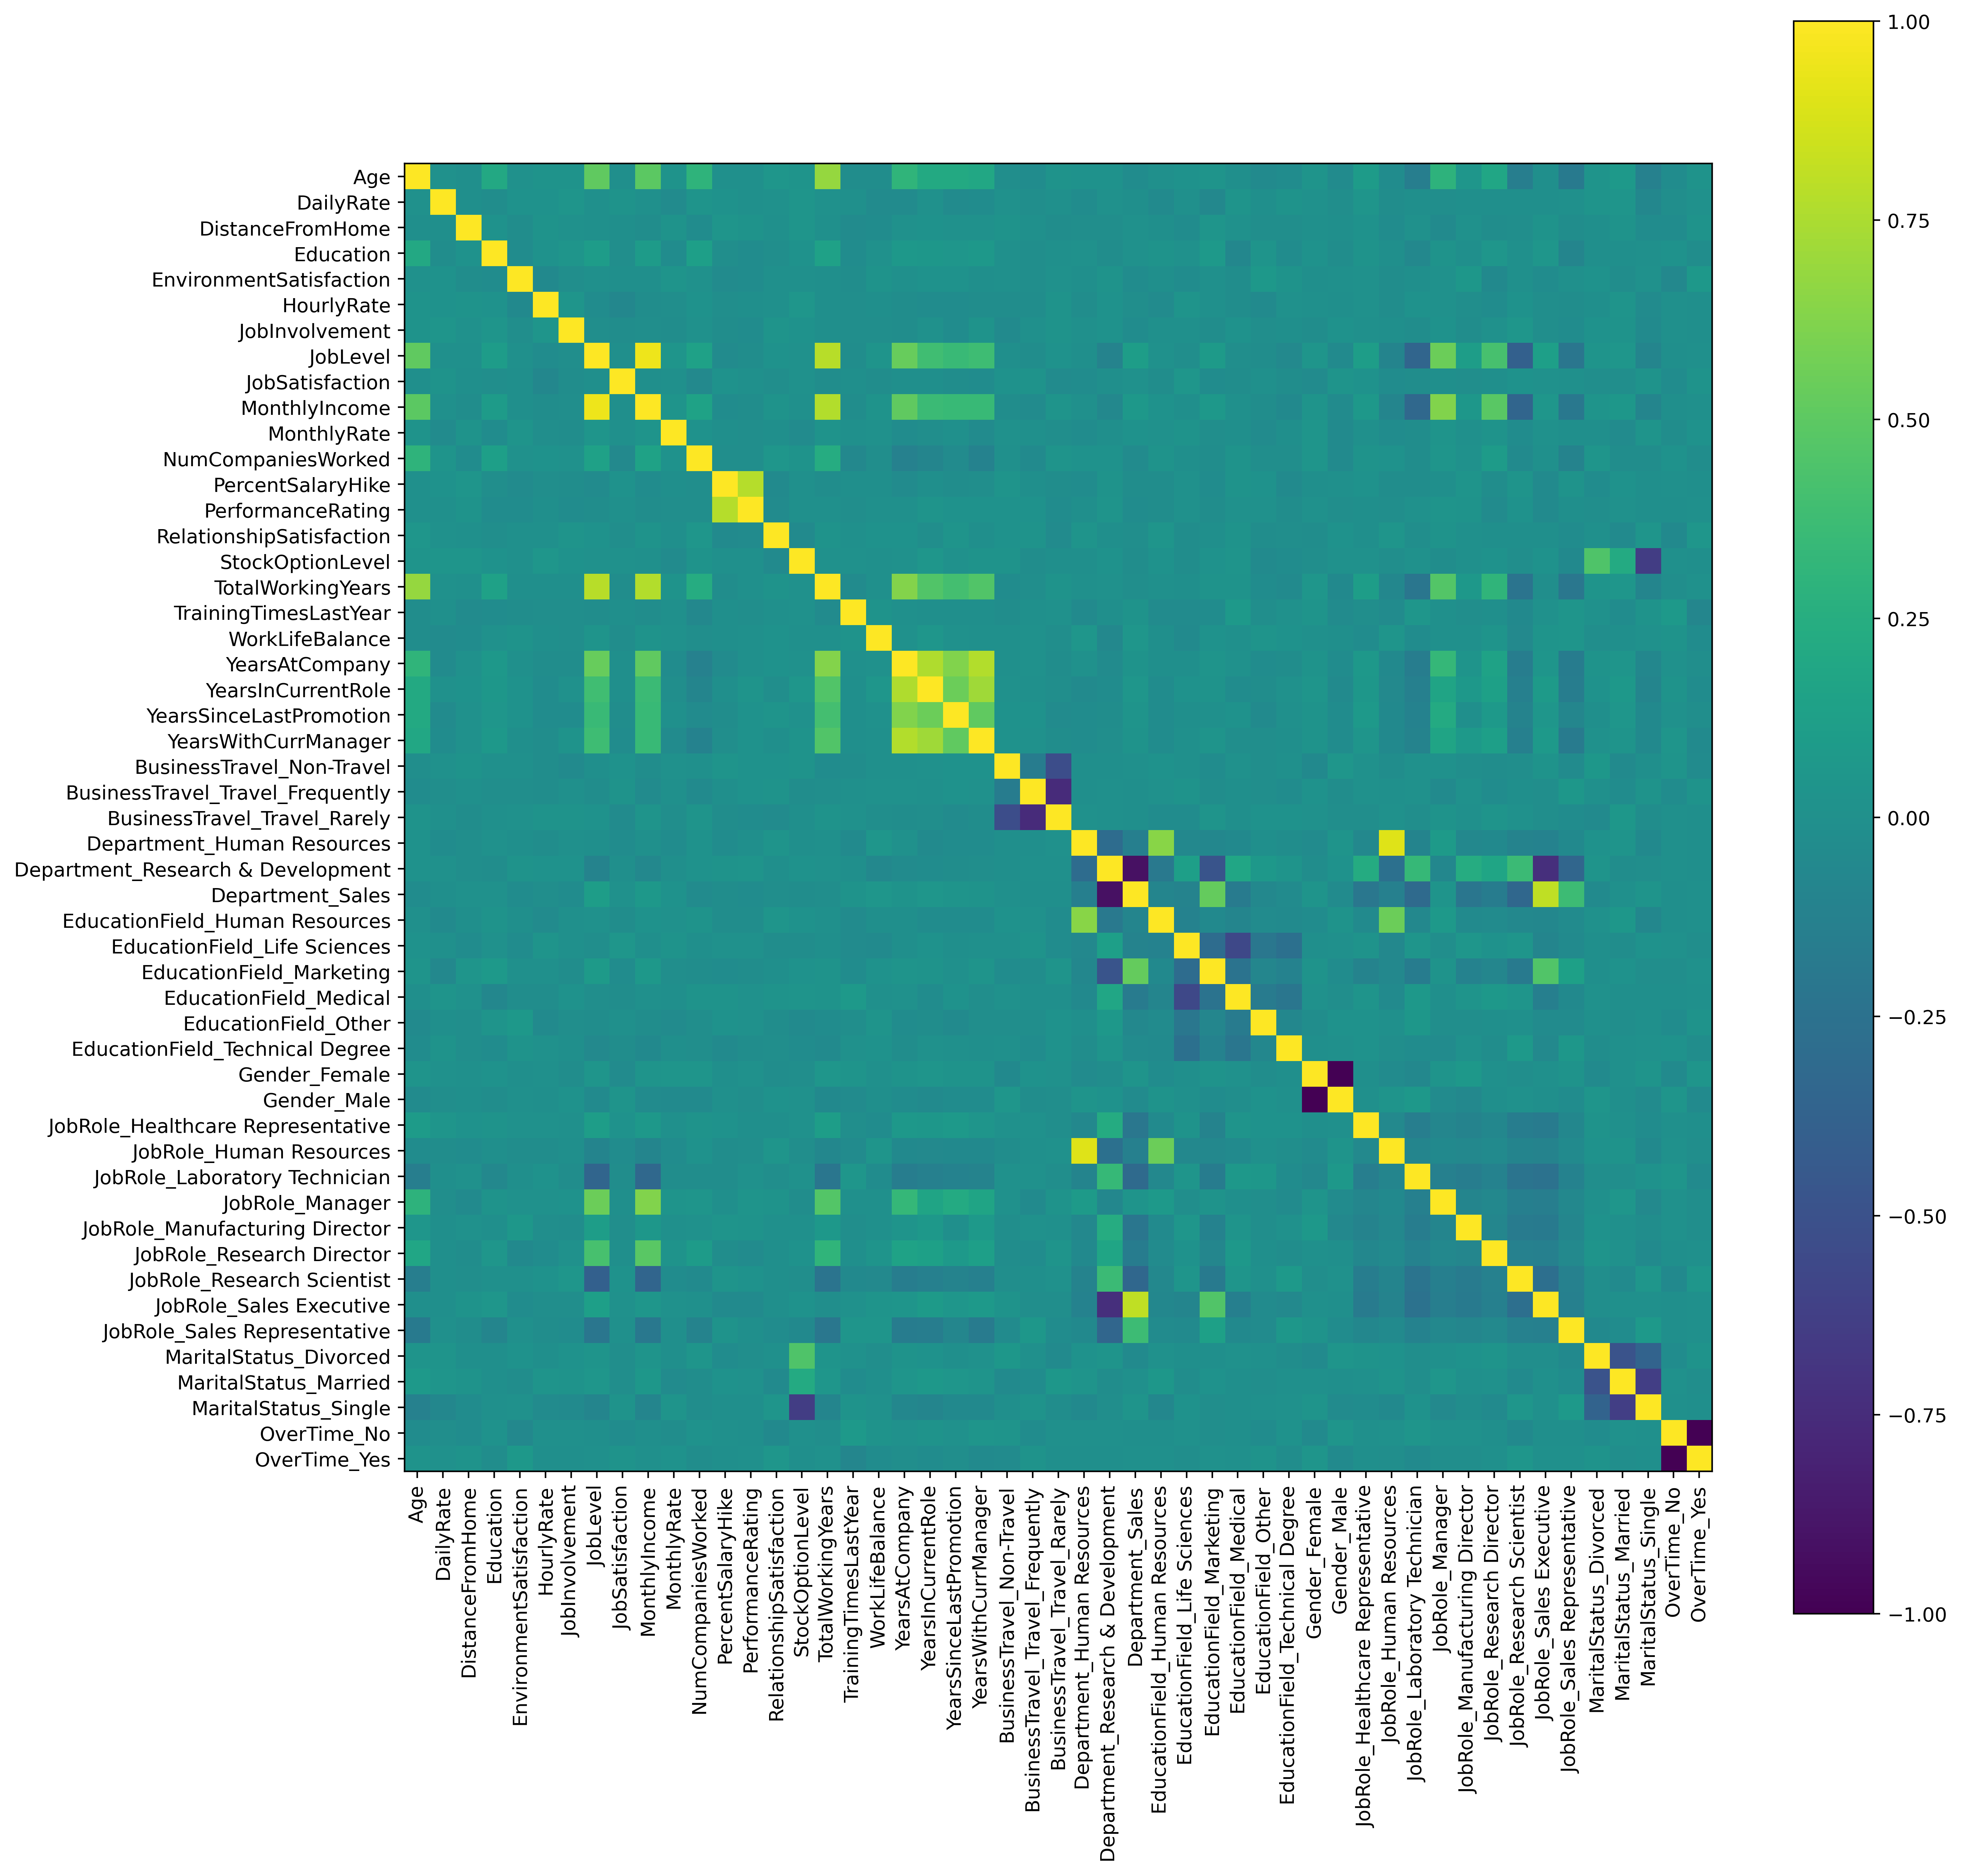

In [8]:
plt.figure(figsize=(15, 15), dpi=400)
plt.imshow(converted_df.corr(), interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(converted_df.columns)), converted_df.columns, rotation='vertical')
plt.yticks(range(len(converted_df.columns)), converted_df.columns)
plt.show()

## 8.3 線形回帰の係数から原因を読み解く

In [9]:
import sklearn.linear_model

linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(converted_df, attrition_label)

linear_model_coef = list(zip(converted_df.columns, linear_model.coef_))
linear_model_coef.append(('intercept', linear_model.intercept_))
linear_model_coef

[('Age', -0.003497140816212385),
 ('DailyRate', -2.6369987619385285e-05),
 ('DistanceFromHome', 0.003606848040482761),
 ('Education', 0.0017222192309431549),
 ('EnvironmentSatisfaction', -0.04050208861410746),
 ('HourlyRate', -0.00017550515338875987),
 ('JobInvolvement', -0.05798579466089123),
 ('JobLevel', -0.004882466209265447),
 ('JobSatisfaction', -0.03715845080871531),
 ('MonthlyIncome', 1.2948843340562788e-06),
 ('MonthlyRate', 4.584874628774105e-07),
 ('NumCompaniesWorked', 0.01721237916906347),
 ('PercentSalaryHike', -0.00217753290430406),
 ('PerformanceRating', 0.018467358370602177),
 ('RelationshipSatisfaction', -0.023017447332449478),
 ('StockOptionLevel', -0.017022043769195173),
 ('TotalWorkingYears', -0.003724955264943262),
 ('TrainingTimesLastYear', -0.013506928678872824),
 ('WorkLifeBalance', -0.031387116754422496),
 ('YearsAtCompany', 0.005492894264489637),
 ('YearsInCurrentRole', -0.009205359488121876),
 ('YearsSinceLastPromotion', 0.010821393431857732),
 ('YearsWithCu

In [10]:
def check_coef(column_names, coef_list, intercept=None):
    weights = dict(zip(column_names, coef_list))
    if intercept:
      weights['intercept'] = intercept
    df = pd.DataFrame.from_dict(weights, orient='index')
    df.columns = ['coef']
    print(pd.__version__)
    df.sort_values(by='coef', key=lambda t:abs(t), inplace=True, ascending=False)
    print(df.head(10))

check_coef(converted_df.columns, linear_model.coef_, linear_model.intercept_)

1.2.4
                                       coef
intercept                          0.874182
JobRole_Sales Representative       0.164880
JobRole_Human Resources            0.124988
OverTime_No                       -0.105340
OverTime_Yes                       0.105340
JobRole_Research Director         -0.092631
JobRole_Healthcare Representative -0.090496
EducationField_Human Resources     0.085261
BusinessTravel_Travel_Frequently   0.079816
Department_Human Resources        -0.078630


In [11]:
import sklearn.preprocessing
 
scaler = sklearn.preprocessing.MinMaxScaler()
standardization_df = pd.DataFrame(scaler.fit_transform(converted_df),
                                  index=converted_df.index,
                                  columns=converted_df.columns)
standardization_df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [12]:
linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(standardization_df, attrition_label)
check_coef(converted_df.columns, linear_model.coef_, linear_model.intercept_)

1.2.4
                                          coef
MaritalStatus_Divorced           -3.296733e+12
MaritalStatus_Married            -3.296733e+12
MaritalStatus_Single             -3.296733e+12
intercept                         3.121492e+12
BusinessTravel_Non-Travel        -1.028916e+12
BusinessTravel_Travel_Rarely     -1.028916e+12
BusinessTravel_Travel_Frequently -1.028916e+12
EducationField_Human Resources    3.983096e+11
EducationField_Technical Degree   3.983096e+11
EducationField_Marketing          3.983096e+11


In [13]:
converted_dropped_df = pd.concat([numerical_df, pd.get_dummies(categorical_df, drop_first=True)], axis=1)
scaler = sklearn.preprocessing.MinMaxScaler()
standardization_dropped_df = pd.DataFrame(scaler.fit_transform(converted_dropped_df),
                                  index=converted_dropped_df.index,
                                  columns=converted_dropped_df.columns)

linear_model = sklearn.linear_model.LinearRegression()
linear_model.fit(standardization_dropped_df, attrition_label)
check_coef(standardization_dropped_df.columns, linear_model.coef_, linear_model.intercept_)

1.2.4
                                  coef
intercept                     0.327084
JobRole_Sales Representative  0.255376
YearsAtCompany                0.219716
JobRole_Human Resources       0.215485
OverTime_Yes                  0.210679
JobInvolvement               -0.173957
YearsInCurrentRole           -0.165696
YearsWithCurrManager         -0.162449
YearsSinceLastPromotion       0.162321
NumCompaniesWorked            0.154911


## 8.4 ロジスティック回帰の係数から原因を読み解く

In [14]:
lr_model = sklearn.linear_model.LogisticRegression(C=0.1)
lr_model.fit(standardization_dropped_df, attrition_label)
check_coef(standardization_dropped_df.columns, lr_model.coef_[0], lr_model.intercept_[0])

1.2.4
                                      coef
OverTime_Yes                      1.259661
JobInvolvement                   -0.719254
EnvironmentSatisfaction          -0.673118
JobSatisfaction                  -0.660775
BusinessTravel_Travel_Frequently  0.651580
MaritalStatus_Single              0.633452
JobRole_Laboratory Technician     0.566878
NumCompaniesWorked                0.564474
DistanceFromHome                  0.527556
Age                              -0.524708


## 8.5 回帰係数のp値を求める

In [15]:
import statsmodels.api

ols_df = standardization_dropped_df.copy()
ols_df['const'] = 1
ols_model = statsmodels.api.OLS(attrition_label, ols_df)
fit_ols_results = ols_model.fit()
fit_ols_summary = fit_ols_results.summary2()
print(fit_ols_summary)

                         Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          0.235    
Dependent Variable:      Attrition             AIC:                     882.5729 
Date:                    2022-01-23 10:03      BIC:                     1120.7587
No. Observations:        1470                  Log-Likelihood:          -396.29  
Df Model:                44                    F-statistic:             11.24    
Df Residuals:            1425                  Prob (F-statistic):      6.55e-65 
R-squared:               0.258                 Scale:                   0.10356  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Age                               -0.1469   0.0557 -2.6363 0.0085 -0.2562 -0.0376
DailyRate                         -0.0368

In [16]:
sorted_ols_coef = fit_ols_summary.tables[1].sort_values(by='Coef.', key=lambda t:abs(t), ascending=False)
sorted_ols_coef = sorted_ols_coef[sorted_ols_coef['P>|t|'] < 0.05]
sorted_ols_coef[:10]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,0.327084,0.138981,2.353445,1.873557e-02,0.054455,0.599714
JobRole_Sales Representative,0.255376,0.086063,2.967310,3.054277e-03,0.086552,0.424200
OverTime_Yes,0.210679,0.018954,11.115247,1.387315e-27,0.173498,0.247860
JobInvolvement,-0.173957,0.035970,-4.836179,1.467103e-06,-0.244517,-0.103398
YearsInCurrentRole,-0.165696,0.069743,-2.375807,1.764221e-02,-0.302507,-0.028886
YearsWithCurrManager,-0.162449,0.067498,-2.406732,1.622254e-02,-0.294855,-0.030043
YearsSinceLastPromotion,0.162321,0.051224,3.168860,1.562894e-03,0.061839,0.262803
NumCompaniesWorked,0.154911,0.034255,4.522336,6.623404e-06,0.087716,0.222107
BusinessTravel_Travel_Frequently,0.152732,0.033034,4.623450,4.115873e-06,0.087931,0.217533
Age,-0.146880,0.055715,-2.636271,8.473313e-03,-0.256172,-0.037588


## 8.6 決定木の可視化から原因を読み解く

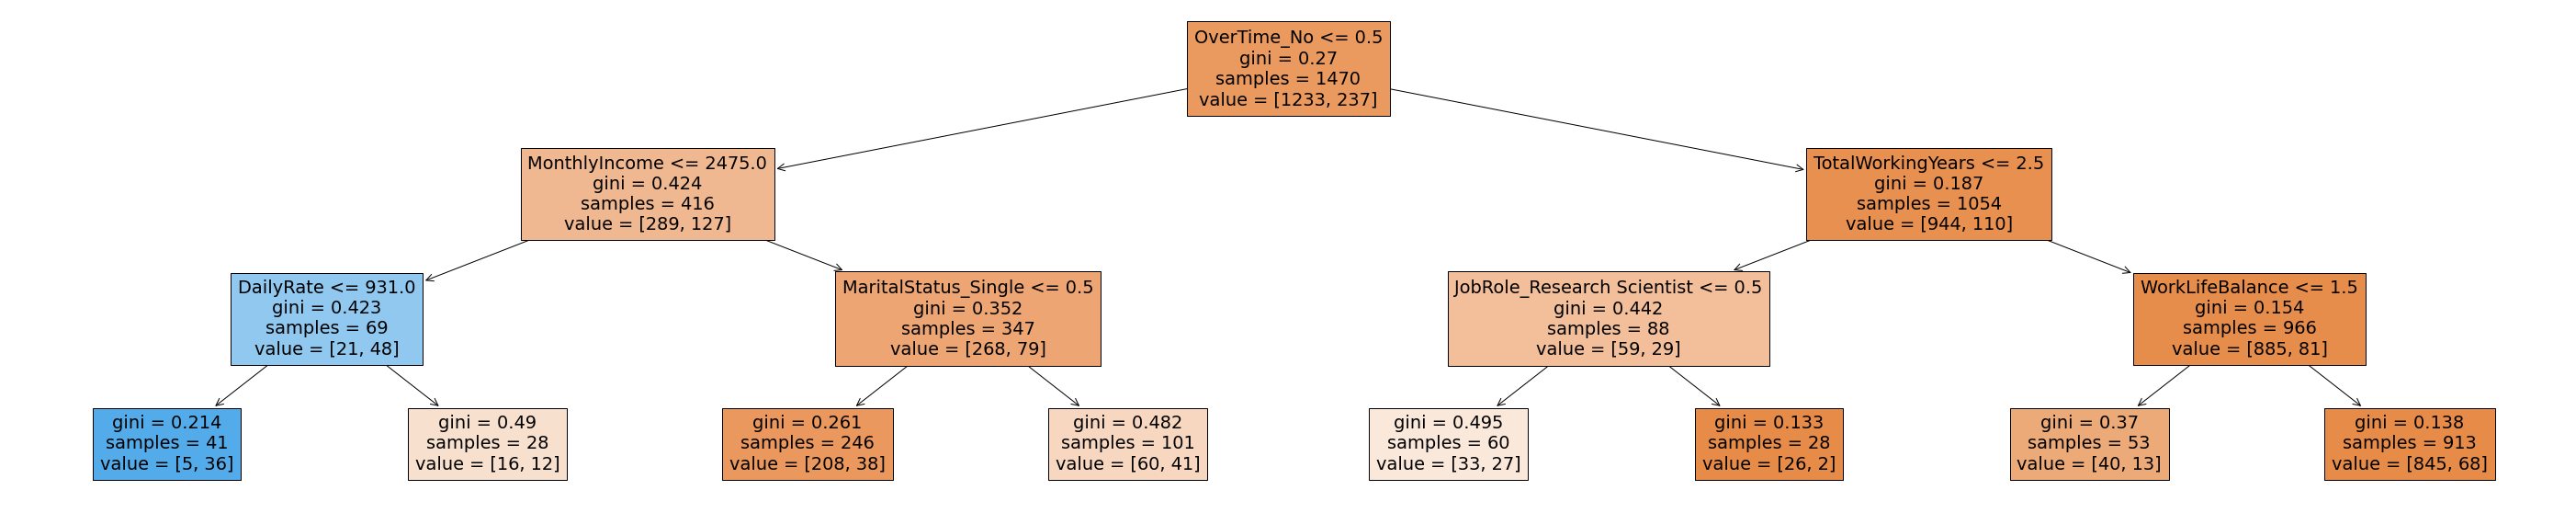

In [17]:
import sklearn.tree

dt_model = sklearn.tree.DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(converted_df, attrition_label)

plt.figure(figsize=(50, 10))
sklearn.tree.plot_tree(dt_model, feature_names=converted_df.columns, filled=True)
plt.show()

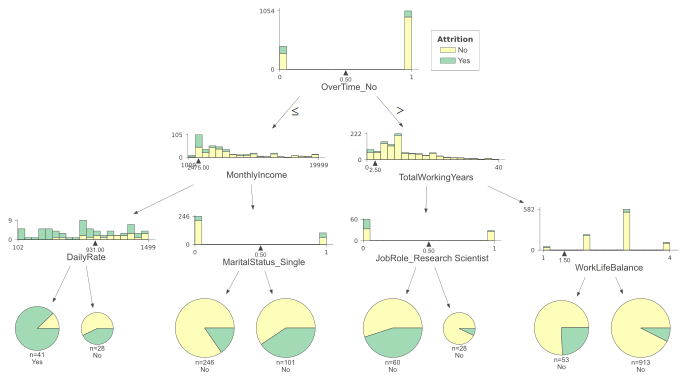

In [18]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dt_model, converted_df, attrition_label, target_name='Attrition',
    feature_names=converted_df.columns, class_names=['No', 'Yes'])              
viz

## 8.7 ランダムフォレストのFeature Importanceの可視化

In [19]:
import sklearn.ensemble
rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=300, min_samples_leaf=100, max_depth=5,
    n_jobs=1, random_state=42)
rf_model.fit(converted_df, attrition_label)
check_coef(converted_df.columns, rf_model.feature_importances_)

1.2.4
                          coef
MonthlyIncome         0.119744
OverTime_Yes          0.118544
OverTime_No           0.107013
JobLevel              0.087204
TotalWorkingYears     0.086532
YearsAtCompany        0.077841
StockOptionLevel      0.072223
YearsWithCurrManager  0.056186
Age                   0.050884
MaritalStatus_Single  0.033496


In [22]:
duplicated_df =  converted_df.copy()
for i in range(10):
    duplicated_df['MonthlyIncome{}'.format(i)] = duplicated_df.MonthlyIncome

rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=300, min_samples_leaf=100, max_depth=5,
    n_jobs=1, random_state=42)
rf_model.fit(duplicated_df, attrition_label)
check_coef(duplicated_df.columns, rf_model.feature_importances_)

1.2.4
                       coef
OverTime_Yes       0.068042
MonthlyIncome8     0.067456
OverTime_No        0.063503
MonthlyIncome9     0.052984
MonthlyIncome6     0.051916
TotalWorkingYears  0.050806
MonthlyIncome3     0.048600
StockOptionLevel   0.048092
MonthlyIncome2     0.045324
MonthlyIncome1     0.042143


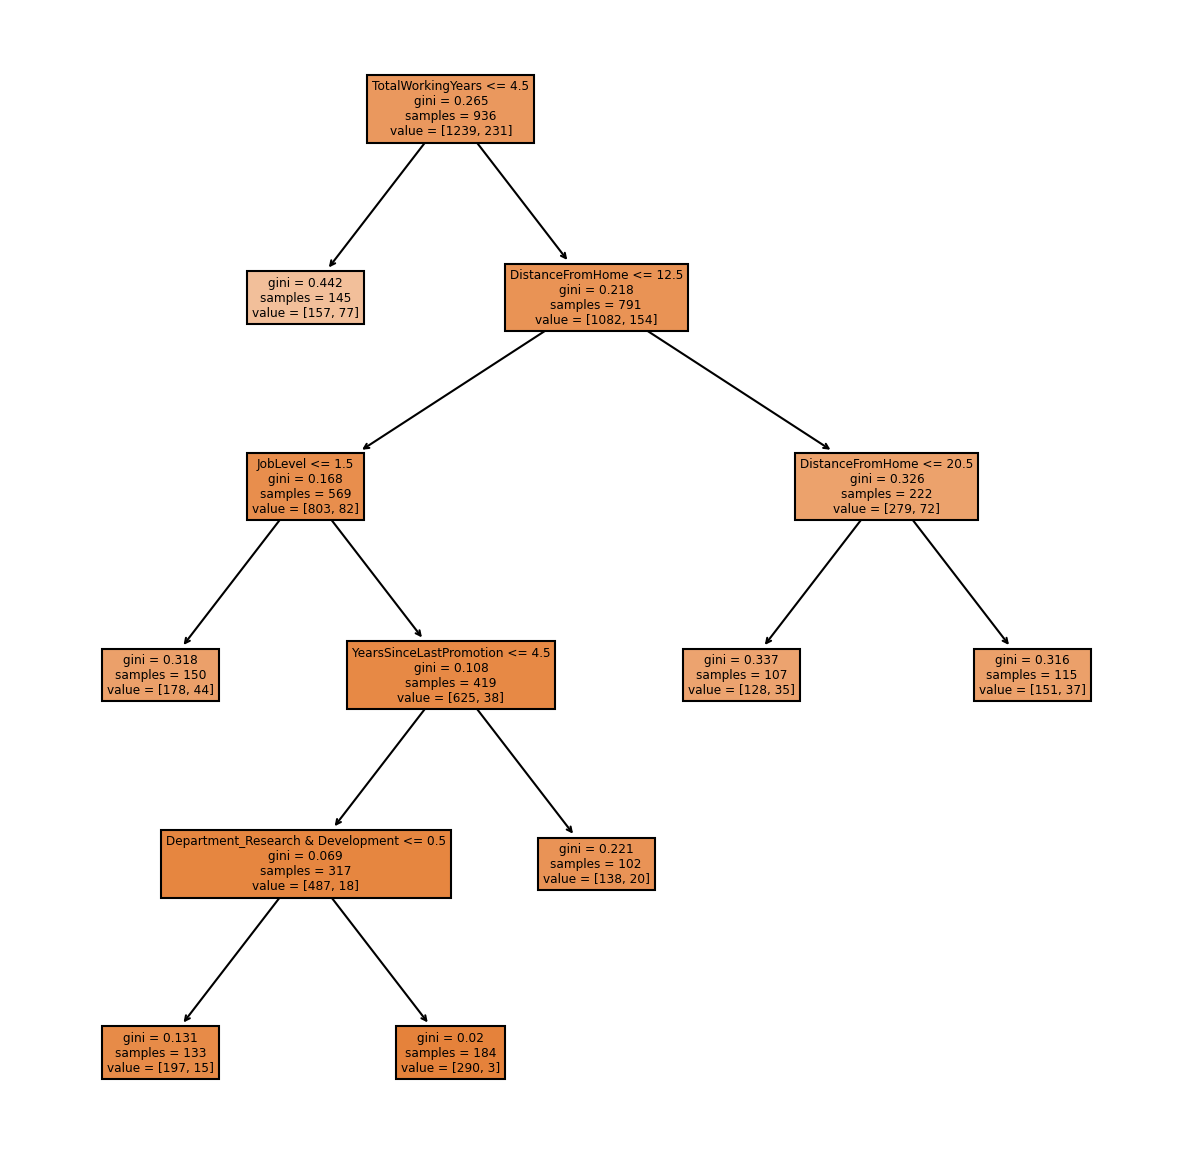

In [23]:
rf_model.fit(converted_df, attrition_label)
plt.figure(figsize=(10, 10), dpi=150)
sklearn.tree.plot_tree(rf_model.estimators_[0], feature_names=converted_df.columns, filled=True)
plt.show()

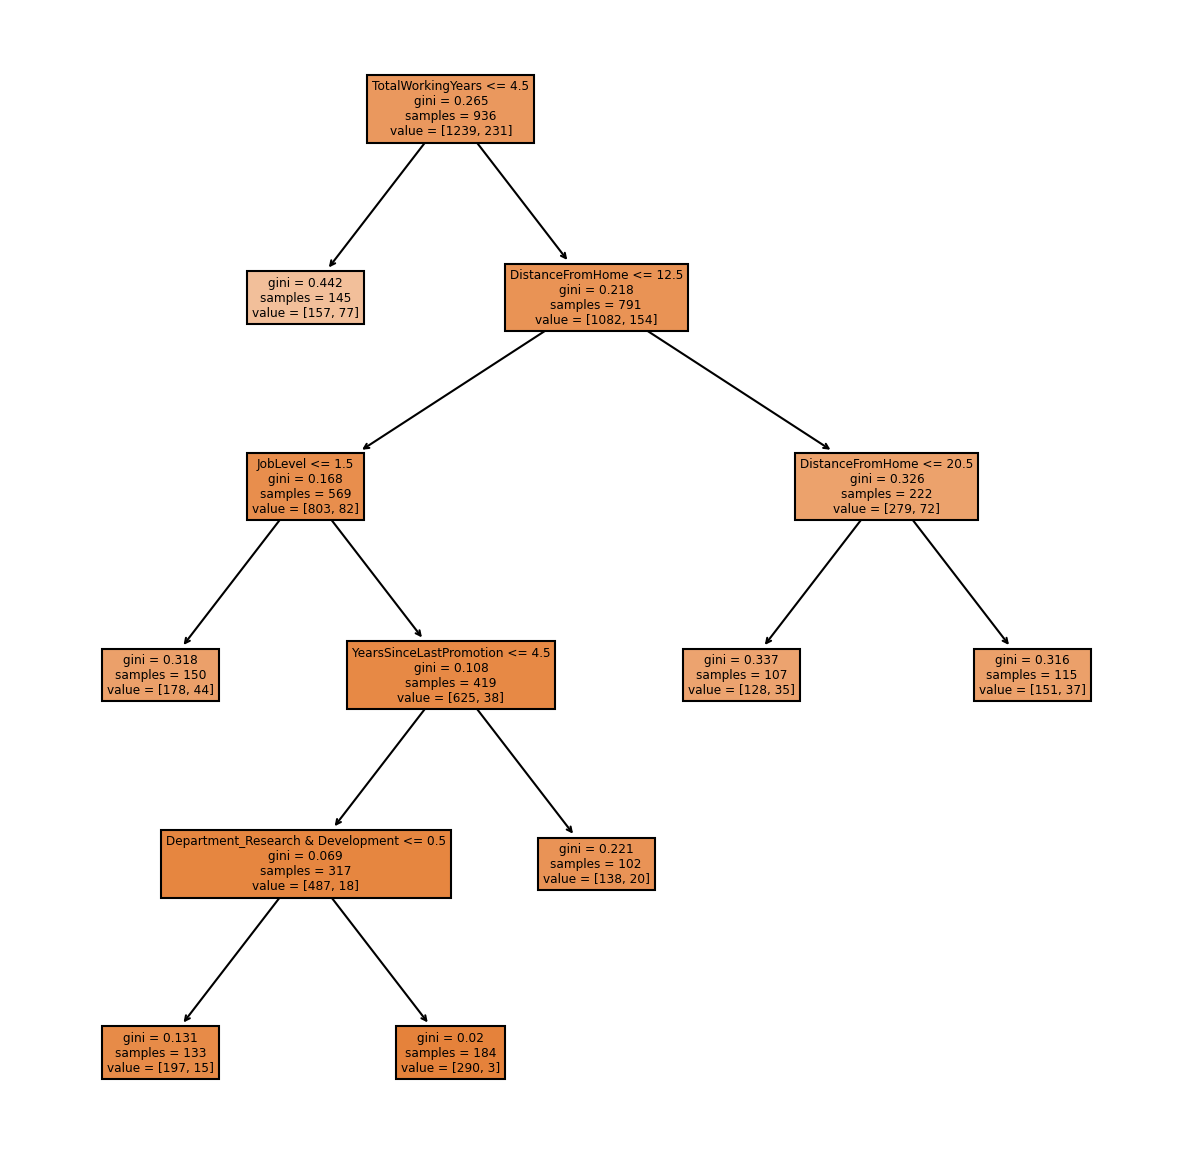

In [24]:
rf_model.fit(converted_df, attrition_label)
plt.figure(figsize=(10, 10), dpi=150)
sklearn.tree.plot_tree(rf_model.estimators_[0], feature_names=converted_df.columns ,filled=True)
plt.show()

## 8.8 SHAPによる寄与の可視化

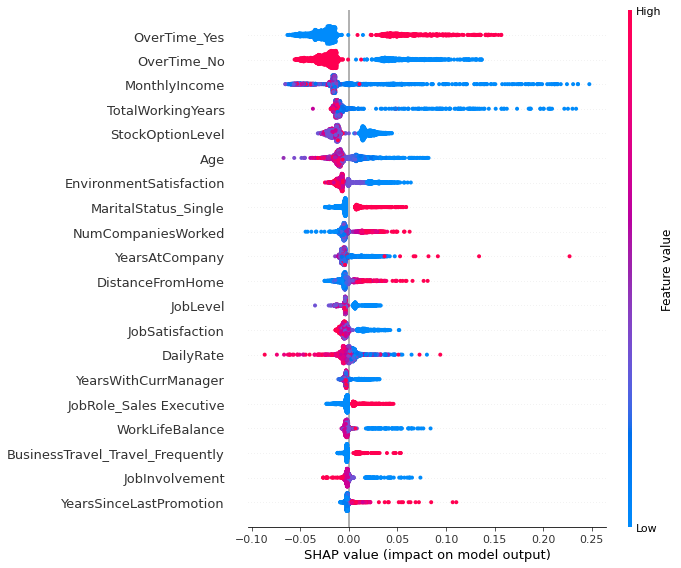

In [31]:
import shap
rf_model = sklearn.ensemble.RandomForestRegressor(n_estimators=300, max_depth=5, n_jobs=1, random_state=42)
rf_model.fit(converted_df, attrition_label)

shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(converted_df)

plt.figure()
shap.summary_plot(shap_values, converted_df, show=False)

## 8.9 従業員満足度をSHAPで可視化する

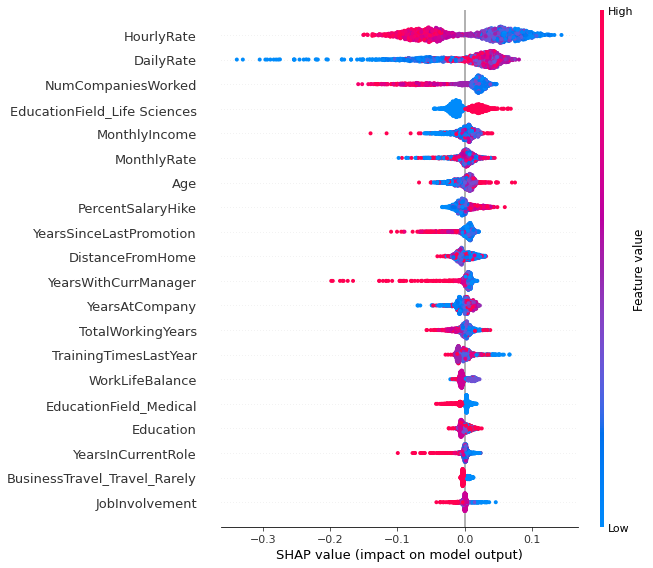

In [32]:
target_label = "JobSatisfaction"
X = converted_df.drop([target_label], axis=1)
Y = converted_df[target_label] 
rf_model = sklearn.ensemble.RandomForestRegressor(n_estimators=300, max_depth=5, n_jobs=1, random_state=42)
rf_model.fit(X, Y)

shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

plt.figure()
shap.summary_plot(shap_values, X, show=False)